In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.around(37.6666,4)

np.float64(37.6667)

In [2]:
# 폰트 설정
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = r"C:\Windows\Fonts\malgun.ttf"  
font_prop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
# data load
df = pd.read_excel(r'.\datasets\250716.xlsx')
df_geo = pd.read_csv(r'.\datasets\df_geo.csv') # 위경도 좌표

print(df.head())
print(df_geo.head())

   순번                   출발지 주소              중간집결지 주소            최종 도착지 주소  \
0   1  경기도 고양시 덕양구 중앙로633번길 12   경기도 고양시 덕양구 혜음로 142  경기도 고양시 덕양구 혜음로 142   
1   2   대구광역시 서구 북비산로61길 20-24      경상북도 경주시 태종로 516  경기도 고양시 덕양구 동헌로 305   
2   3   서울특별시 양천구 목동중앙본로11길 19  서울특별시 서초구 사평대로45길 26  강원특별자치도 동해시 대동로 430   
3   4        서울특별시 강남구 학동로 432       경기도 과천시 중앙로 294      경기도 과천시 중앙로 294   
4   5         대구광역시 남구 명덕로 236      대구광역시 수성구 무열로 56     대구광역시 수성구 무열로 56   

    중간집결 기한    최종도착 기한 이동방법  
0  0+1일 14시   0+1일 14시   개별  
1  0+28일 9시  0+28일 14시   집단  
2   0+3일 8시   0+3일 14시   집단  
3  0+1일 14시   0+1일 14시   개별  
4  0+3일 14시   0+3일 14시   개별  
   num  start_lat   start_lng    mid_lat     mid_lng    end_lat     end_lng
0    1  37.626949  126.827581  37.713020  126.902443  37.713020  126.902443
1    2  35.881731  128.567540  35.839566  129.185196  37.713651  126.889915
2    3  37.540484  126.867756  37.506451  127.012692  37.503393  129.130509
3    4  37.517981  127.048764  37.441493  126.996973 

In [96]:
# 위경도 소수점 넷 째 자리까지 반올림
df_geo['start_lat'] = np.around(df_geo['start_lat'], 4)
df_geo['start_lng'] = np.around(df_geo['start_lat'], 4)
df_geo['mid_lat'] = np.around(df_geo['mid_lat'], 4)
df_geo['mid_lng'] = np.around(df_geo['mid_lng'], 4)
df_geo['end_lat'] = np.around(df_geo['end_lat'], 4)
df_geo['end_lng'] = np.around(df_geo['end_lng'], 4)

In [97]:
# Merge
df_merge = pd.merge(df, df_geo, left_on = '순번', right_on = 'num', how = 'left').drop(columns = ['num'])

print(df_merge.head(3))
print(df_merge.tail(3))

   순번                   출발지 주소              중간집결지 주소            최종 도착지 주소  \
0   1  경기도 고양시 덕양구 중앙로633번길 12   경기도 고양시 덕양구 혜음로 142  경기도 고양시 덕양구 혜음로 142   
1   2   대구광역시 서구 북비산로61길 20-24      경상북도 경주시 태종로 516  경기도 고양시 덕양구 동헌로 305   
2   3   서울특별시 양천구 목동중앙본로11길 19  서울특별시 서초구 사평대로45길 26  강원특별자치도 동해시 대동로 430   

    중간집결 기한    최종도착 기한 이동방법  start_lat  start_lng  mid_lat   mid_lng  end_lat  \
0  0+1일 14시   0+1일 14시   개별    37.6269    37.6269  37.7130  126.9024  37.7130   
1  0+28일 9시  0+28일 14시   집단    35.8817    35.8817  35.8396  129.1852  37.7137   
2   0+3일 8시   0+3일 14시   집단    37.5405    37.5405  37.5065  127.0127  37.5034   

    end_lng  
0  126.9024  
1  126.8899  
2  129.1305  
            순번                    출발지 주소               중간집결지 주소  \
815772  815773      광주광역시 광산구 장신로19번길 10       광주광역시 북구 우치로 339   
815773  815774        서울특별시 동작구 사당로8길 55  서울특별시 강동구 양재대로156길 11   
815774  815775  경기도 성남시 중원구 자혜로17번길 42-3     강원특별자치도 원주시 연세대길 1   

                      최종 도착지 주소   중간집결 기한

In [98]:
# statistics
print(df_merge.shape)
print(df_merge['이동방법'].value_counts())

# 위경도 NA 확인
num_na = df_merge.isna().any(axis = 1).sum()
mask = df_merge.notna().all(axis = 1)
print('num_na:', num_na)

df_merge = df_merge[mask].reset_index(drop = True)
print(df_merge)
# 변환안된 것: 16,233행
# 사용가능 총: 799,542행

(815775, 13)
이동방법
개별    412505
집단    403270
Name: count, dtype: int64
num_na: 16233
            순번                    출발지 주소               중간집결지 주소  \
0            1   경기도 고양시 덕양구 중앙로633번길 12    경기도 고양시 덕양구 혜음로 142   
1            2    대구광역시 서구 북비산로61길 20-24       경상북도 경주시 태종로 516   
2            3    서울특별시 양천구 목동중앙본로11길 19   서울특별시 서초구 사평대로45길 26   
3            4         서울특별시 강남구 학동로 432        경기도 과천시 중앙로 294   
4            5          대구광역시 남구 명덕로 236       대구광역시 수성구 무열로 56   
...        ...                       ...                    ...   
799537  815770  서울특별시 관악구 남부순환로230길 43-5   경기도 이천시 청강가창로 389-94   
799538  815771         서울특별시 마포구 만리재로 60       경기도 남양주시 덕릉로 967   
799539  815773      광주광역시 광산구 장신로19번길 10       광주광역시 북구 우치로 339   
799540  815774        서울특별시 동작구 사당로8길 55  서울특별시 강동구 양재대로156길 11   
799541  815775  경기도 성남시 중원구 자혜로17번길 42-3     강원특별자치도 원주시 연세대길 1   

                      최종 도착지 주소    중간집결 기한    최종도착 기한 이동방법  start_lat  \
0           경기도 고양시 덕양구 혜음로 142   0+1일

In [99]:
# 집단 / 개별 split
df_group = df_merge[df_merge['이동방법'] == '집단'].drop(columns = '이동방법')
df_solo = df_merge[df_merge['이동방법'] == '개별'].drop(columns = '이동방법')

# EDA

## 집단

In [100]:
# 집단 / 중간집결 기한
mid_group = df_group['중간집결 기한'].str.split('일', expand = True)
mid_group.columns = ['Mday_mid', 'Mhour_mid']
mid_group['Mday_mid'] = mid_group['Mday_mid'].str.replace('0+', '').astype(int)
mid_group['Mhour_mid'] = mid_group['Mhour_mid'].str.replace('시', '').astype(int)
mid_group['mid_td'] = (pd.to_timedelta(mid_group['Mday_mid'], unit = 'D') + pd.to_timedelta(mid_group['Mhour_mid'], unit = 'h'))

# 집단 / 최종도착 기한
end_group = df_group['최종도착 기한'].str.split('일', expand = True)
end_group.columns = ['Mday_end', 'Mhour_end']
end_group['Mday_end'] = end_group['Mday_end'].str.replace('0+', '').astype(int)
end_group['Mhour_end'] = end_group['Mhour_end'].str.replace('시', '').astype(int)
end_group['end_td'] = (pd.to_timedelta(end_group['Mday_end'], unit = 'D') + pd.to_timedelta(end_group['Mhour_end'], unit = 'h'))

df_group = pd.concat([df_group, mid_group, end_group], axis = 1).drop(columns = ['중간집결 기한', '최종도착 기한', 'Mday_mid', 'Mhour_mid', 'Mday_end', 'Mhour_end'])
print(df_group.head(3))

   순번                  출발지 주소              중간집결지 주소            최종 도착지 주소  \
1   2  대구광역시 서구 북비산로61길 20-24      경상북도 경주시 태종로 516  경기도 고양시 덕양구 동헌로 305   
2   3  서울특별시 양천구 목동중앙본로11길 19  서울특별시 서초구 사평대로45길 26  강원특별자치도 동해시 대동로 430   
5   6    충청북도 청주시 상당구 수영로 328     충청북도 증평군 초평로 1717    충청북도 증평군 초평로 1717   

   start_lat  start_lng  mid_lat   mid_lng  end_lat   end_lng  \
1    35.8817    35.8817  35.8396  129.1852  37.7137  126.8899   
2    37.5405    37.5405  37.5065  127.0127  37.5034  129.1305   
5    36.6321    36.6321  36.8044  127.5606  36.8044  127.5606   

            mid_td           end_td  
1 28 days 09:00:00 28 days 14:00:00  
2  3 days 08:00:00  3 days 14:00:00  
5 23 days 14:00:00 23 days 14:00:00  


In [101]:
# (집단) 중간 장소 = 최종 장소
mask1 = (df_group['mid_lat'] == df_group['end_lat']) & (df_group['mid_lng'] == df_group['end_lng'])
print(df_group[mask1].shape)
# 50,640건

#  (중간 장소 = 최종 장소) & (중간 시간 != 도착 시간)
mask2 = df_group['mid_td'] != df_group['end_td']
mask3 = mask1 & mask2
df_group[mask3]
# 1건

(50640, 12)


,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td
168497,171406,경기도 시흥시 하중로209번길 9,강원특별자치도 원주시 북원로 2777,강원특별자치도 원주시 북원로 2777,37.3946,37.3946,37.39,127.9441,37.39,127.9441,3 days 11:00:00,3 days 14:00:00


In [102]:
#(중간 장소 != 최종 장소) & (중간 시간 = 도착 시간)
mask1 = (df_group['mid_lat'] != df_group['end_lat']) | (df_group['mid_lng'] != df_group['end_lng'])
mask2 = df_group['mid_td'] == df_group['end_td']
mask3 = mask1 & mask2

df_temp = df_group.loc[mask3].copy()
df_temp
# 12,313건 존재
# 그렇다면 실제로 떨어진 거리는? 위경도로 거리 계산.
# >> geopy 라이브러리 활용
# from geopy.distance import geodesic

# # 우선은 계산되는것만... (위경도 NA값이 있어서)
# def distance(row):
#     try:
#         return geodesic((row['mid_lat'], row['mid_lng']), (row['end_lat'], row['end_lng'])).km
#     except Exception:
#         return np.nan

# df_temp['mid_to_end'] = df_temp.apply(distance, axis = 1)

# df_temp[df_temp[df_temp.notna()]['mid_to_end'] > 3]
# # 가정: "1시간에 늦어도 3km를 걷는다고 하면, 3km 이상 떨어진 것은 데이터가 잘못된 것이다."
# # 2562건 존재.

,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td
72,74,대전광역시 서구 정림서로 162-15,대전광역시 서구 구봉산북로94번길 77,대전광역시 서구 구봉산북로 184-105,36.3035,36.3035,36.2898,127.3309,36.2890,127.3443,1 days 14:00:00,1 days 14:00:00
116,119,충청북도 청주시 청원구 율봉로222번길 62,충청북도 청주시 청원구 외남로 39,충청북도 청주시 청원구 원통숲안1길 39,36.6652,36.6652,36.6994,127.4844,36.7020,127.5046,1 days 14:00:00,1 days 14:00:00
474,483,경상남도 창원시 성산구 원이대로878번길 10,경상남도 창원시 진해구 충장로 10-40,경상남도 창원시 진해구 충장로 1,35.2093,35.2093,35.1490,128.6521,35.1537,128.6520,1 days 14:00:00,1 days 14:00:00
590,600,경상남도 사천시 정동면 복상2길 45,경상남도 사천시 사천대로 1891-46,경상남도 사천시 사천대로 1949,35.0528,35.0528,35.0852,128.0765,35.0921,128.0812,5 days 14:00:00,5 days 14:00:00
608,619,광주광역시 북구 운암산길 48,광주광역시 북구 우치로 336,광주광역시 북구 우치로 339,35.1795,35.1795,35.1946,126.9040,35.1950,126.9038,28 days 14:00:00,28 days 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
799435,815668,충청북도 청주시 서원구 서원남로43번길 10,충청북도 청주시 청원구 외남로 39,충청북도 청주시 청원구 원통숲안1길 39,36.6219,36.6219,36.6994,127.4844,36.7020,127.5046,3 days 14:00:00,3 days 14:00:00
799436,815669,경상남도 창원시 마산회원구 양덕서로 30,경상남도 사천시 사천대로 1891-46,경상남도 사천시 사천대로 1949,35.2273,35.2273,35.0852,128.0765,35.0921,128.0812,3 days 14:00:00,3 days 14:00:00
799495,815728,경상남도 창원시 진해구 중원서로 41-1,경상남도 창원시 진해구 충무로 37,경상남도 창원시 진해구 충장로 1,35.1478,35.1478,35.1488,128.6562,35.1537,128.6520,1 days 14:00:00,1 days 14:00:00
799514,815747,충청남도 서산시 대산읍 평신2로 26,충청북도 청주시 청원구 외남로 39,충청북도 청주시 청원구 원통숲안1길 39,36.9929,36.9929,36.6994,127.4844,36.7020,127.5046,5 days 14:00:00,5 days 14:00:00


In [103]:
# 중간집결 시간이 최종도착 시간 보다 늦은 경우?
df_group[df_group['mid_td'] > df_group['end_td']]
# 없다. 정상.

,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td


## ■ 개별

In [104]:
# 개별 / 중간집결 기한
mid_solo = df_solo['중간집결 기한'].str.split('일', expand = True)
mid_solo.columns = ['Mday_mid', 'Mhour_mid']
mid_solo['Mday_mid'] = mid_solo['Mday_mid'].str.replace('0+', '').astype(int)
mid_solo['Mhour_mid'] = mid_solo['Mhour_mid'].str.replace('시', '').astype(int)
mid_solo['mid_td'] = (pd.to_timedelta(mid_solo['Mday_mid'], unit = 'D') + pd.to_timedelta(mid_solo['Mhour_mid'], unit = 'h'))

# 개별 / 최종도착 기한
end_solo = df_solo['최종도착 기한'].str.split('일', expand = True)
end_solo.columns = ['Mday_end', 'Mhour_end']
end_solo['Mday_end'] = end_solo['Mday_end'].str.replace('0+', '').astype(int)
end_solo['Mhour_end'] = end_solo['Mhour_end'].str.replace('시', '').astype(int)
end_solo['end_td'] = (pd.to_timedelta(end_solo['Mday_end'], unit = 'D') + pd.to_timedelta(end_solo['Mhour_end'], unit = 'h'))

df_solo = pd.concat([df_solo, mid_solo, end_solo], axis = 1).drop(columns = ['중간집결 기한', '최종도착 기한', 'Mday_mid', 'Mhour_mid', 'Mday_end', 'Mhour_end'])
print(df_solo.head(3))

   순번                   출발지 주소             중간집결지 주소            최종 도착지 주소  \
0   1  경기도 고양시 덕양구 중앙로633번길 12  경기도 고양시 덕양구 혜음로 142  경기도 고양시 덕양구 혜음로 142   
3   4        서울특별시 강남구 학동로 432      경기도 과천시 중앙로 294      경기도 과천시 중앙로 294   
4   5         대구광역시 남구 명덕로 236     대구광역시 수성구 무열로 56     대구광역시 수성구 무열로 56   

   start_lat  start_lng  mid_lat   mid_lng  end_lat   end_lng          mid_td  \
0    37.6269    37.6269  37.7130  126.9024  37.7130  126.9024 1 days 14:00:00   
3    37.5180    37.5180  37.4415  126.9970  37.4415  126.9970 1 days 14:00:00   
4    35.8547    35.8547  35.8632  128.6512  35.8632  128.6512 3 days 14:00:00   

           end_td  
0 1 days 14:00:00  
3 1 days 14:00:00  
4 3 days 14:00:00  


In [105]:
# (개별) 중간장소와 최종장소가 다른 경우?
print(df_solo[(df_solo['mid_lat'] != df_solo['end_lat']) | (df_solo['mid_lng'] != df_solo['end_lng'])].shape)
df_solo[(df_solo['mid_lat'] != df_solo['end_lat']) | (df_solo['mid_lng'] != df_solo['end_lng'])].head()
# 2건
# 거의 차이 없음. 무시가능

(1, 12)


,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td
304860,311085,경기도 수원시 권선구 권중로 110,경기도 화성시 푸른들판로 1263,경기도 화성시 푸른들판로 1263,37.2487,37.2487,37.216,126.8721,37.2161,126.8721,1 days 14:00:00,1 days 14:00:00


In [106]:
# (개별) 중간시간과 최종시간이 다른 경우?
print(df_solo[df_solo['mid_td'] != df_solo['end_td']].shape)
df_solo[df_solo['mid_td'] != df_solo['end_td']].head()
# 296건

# 중간장소와 최종장소도 다른가?
df_temp = df_solo[df_solo['mid_td'] != df_solo['end_td']]
print(df_temp[(df_temp['mid_lat'] != df_temp['end_lat']) | (df_temp['mid_lng'] != df_temp['end_lng'])])

df_solo[df_solo['mid_td'] != df_solo['end_td']].head()
# 결론
# 중간장소와 최종장소는 모두 같은데, 도착시간이 다른 경우가 296건 있다.

(296, 12)
Empty DataFrame
Columns: [순번, 출발지 주소, 중간집결지 주소, 최종 도착지 주소, start_lat, start_lng, mid_lat, mid_lng, end_lat, end_lng, mid_td, end_td]
Index: []


,순번,출발지 주소,중간집결지 주소,최종 도착지 주소,start_lat,start_lng,mid_lat,mid_lng,end_lat,end_lng,mid_td,end_td
8895,9022,강원특별자치도 원주시 서원대로 290,강원특별자치도 춘천시 영서로 3272-1,강원특별자치도 춘천시 영서로 3272-1,37.3372,37.3372,37.9418,127.7146,37.9418,127.7146,1 days 08:00:00,1 days 10:00:00
10457,10602,경기도 파주시 와석순환로 15,경기도 양주시 감악산로 218,경기도 양주시 감악산로 218,37.7093,37.7093,37.8847,126.9800,37.8847,126.9800,1 days 11:00:00,1 days 14:00:00
20730,21019,강원특별자치도 춘천시 영서로 3034,강원특별자치도 춘천시 영서로 3272-1,강원특별자치도 춘천시 영서로 3272-1,37.9230,37.9230,37.9418,127.7146,37.9418,127.7146,1 days 08:00:00,1 days 10:00:00
22497,22817,경기도 수원시 장안구 수성로 271,경기도 수원시 팔달구 고화로 120,경기도 수원시 팔달구 고화로 120,37.2904,37.2904,37.2802,127.0075,37.2802,127.0075,1 days 08:00:00,1 days 14:00:00
25616,25971,경기도 고양시 덕양구 신원로 60,경기도 양주시 감악산로 218,경기도 양주시 감악산로 218,37.6657,37.6657,37.8847,126.9800,37.8847,126.9800,1 days 11:00:00,1 days 14:00:00


In [148]:
# 중간집결과 최종도착 장소가 같고, 도착시간도 같은가?
num1 = df_group[df_group['중간집결지 주소'] == df_group['최종 도착지 주소']].index.to_list()
print(np.array_equal(df_group.loc[num1, ['Mday_mid']].to_numpy(), df_group.loc[num1, ['Mday_end']].to_numpy()))
# True. 정상

# 중간집결과 최종도착 장소가 다른데 도착시간이 같은 경우
num2 = df_group[df_group['중간집결지 주소'] != df_group['최종 도착지 주소']].index.to_list()
print(np.array_equal(df_group.loc[num2, ['Mday_mid']].to_numpy(), df_group.loc[num2, ['Mday_end']].to_numpy()))

KeyError: "None of [Index(['Mday_mid'], dtype='object')] are in the [columns]"

# 시각화

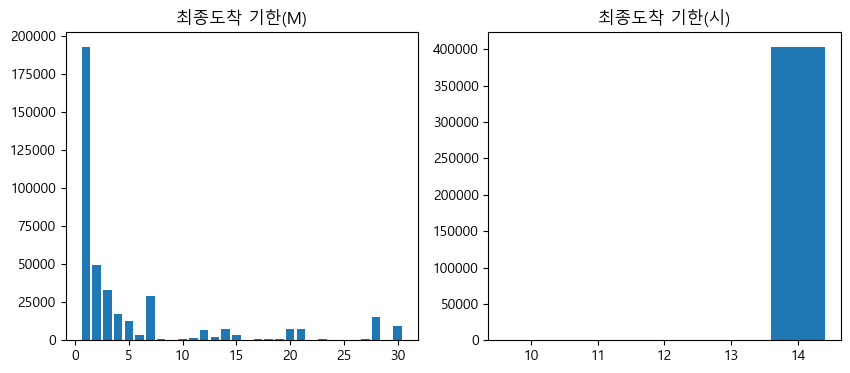

In [ ]:
# 막대그래프
idx1 = np.sort(Mday_fin_group.unique())
height1 = Mday_fin_group.value_counts().sort_index()

idx2 = np.sort(Mhour_fin_group.unique())
height2 = Mhour_fin_group.value_counts().sort_index()

fig = plt.figure(figsize = (10,4))

ax = fig.add_subplot(1, 2, 1)
ax.bar(idx1, height1)
ax.set_title('최종도착 기한(M)')

ax = fig.add_subplot(1, 2, 2)
ax.bar(idx2, height2)
ax.set_title('최종도착 기한(시)')

plt.show()

# 위경도

In [ ]:
# data load


   num  start_lat   start_lng    mid_lat     mid_lng    end_lat     end_lng
0    1  37.626949  126.827581  37.713020  126.902443  37.713020  126.902443
1    2  35.881731  128.567540  35.839566  129.185196  37.713651  126.889915
2    3  37.540484  126.867756  37.506451  127.012692  37.503393  129.130509
3    4  37.517981  127.048764  37.441493  126.996973  37.441493  126.996973
4    5  35.854689  128.595157  35.863198  128.651230  35.863198  128.651230


0.0

In [132]:
geodesic((df_geo['mid_lat'][1], df_geo['mid_lng'][1]), (df_geo['end_lat'][1], df_geo['end_lng'][1])).km

291.93534114858045

In [127]:
geopy.distance.distance((df_geo['mid_lat'][1], df_geo['mid_lng'][1]), (df_geo['end_lat'][1], df_geo['end_lat'][1])).km

7803.627610052918

In [128]:
geopy.distance.distance((df_geo['mid_lat'][0], df_geo['mid_lng'][0]), (df_geo['end_lat'][0], df_geo['end_lat'][0])).km

7520.834268313478

0.0

In [ ]:
df_geo['mid_lat'][0]
df_geo['mid_lng'][0]


np.float64(37.7130201)